In [16]:
import pandas as pd
import numpy as np

# Graph
import plotly.express as px
import matplotlib.pyplot as plt

# Keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import callbacks

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# tf
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import SGD


from sklearn.ensemble import RandomForestClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDClassifier, ElasticNet, BayesianRidge
from sklearn.multiclass import OutputCodeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [17]:
path = r"D:\TRAVAIL\Inge_3\Projet - Prédiction du type d’application Internet dans le contexte de traffic chiffré\data\dataset_clean.csv"
TARGET = 'Label'

In [18]:
df = pd.read_csv(path)

In [19]:
df = df[['Init_Win_bytes_forward',
'Total Length of Fwd Packets',
'Bwd Header Length',
'Destination Port',
'Subflow Fwd Bytes',
'Packet Length Std',
'Packet Length Variance',
'Bwd Packets/s',
'Average Packet Size',
'Bwd Packet Length Std',
         'Label']]

In [20]:
df_b = df[df['Label']==1]
df_a = df[df['Label']==0]

In [21]:
df_b= df_b[0:2241]

In [22]:
df = pd.concat([df_a, df_b], axis=0)

In [23]:
df = df.sample(frac=1)

In [24]:
y = df[TARGET]
X = df.drop([TARGET],axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
#model = DecisionTreeClassifier(max_depth=4)
model = RandomForestClassifier(n_estimators=25, random_state=1)
#model = MLPClassifier(hidden_layer_sizes=(30,), random_state=1, warm_start=True)


#from sklearn.svm import SVC
#model = SVC(gamma='auto')

In [27]:
model = model.fit(X_train, y_train)

In [28]:
y_pred = model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred)
print("df test accuracy : {:.4f}".format(acc_dt))

df test accuracy : 0.9944


In [29]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [30]:
cm = confusion_matrix(y_test, y_pred)

[Text(0.5, 51.0, 'Predicted label'), Text(69.0, 0.5, 'True label')]

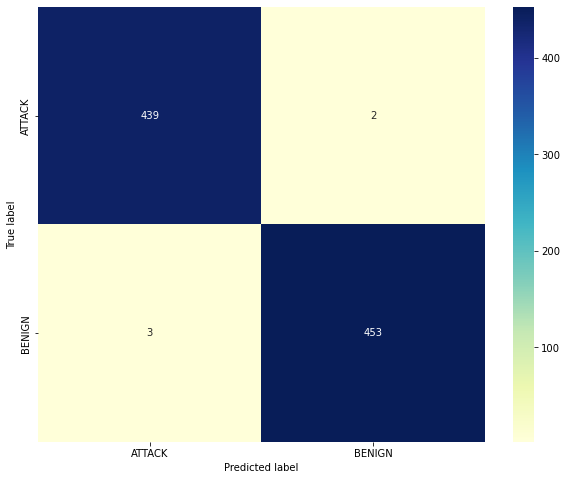

In [31]:
plt.figure(figsize = (10,8))
cm_matrix = pd.DataFrame(data=cm,
                         columns = ["ATTACK", "BENIGN"],
                         index = ["ATTACK", "BENIGN"]
                        )

s=sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
s.set(xlabel='Predicted label', ylabel='True label')